In [2]:
import os
os.chdir("D://Master//10. TFM//Data")

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy.stats import boxcox, probplot, norm, shapiro
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import shapiro, probplot
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster import cluster_visualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import davies_bouldin_score

In [4]:
df = pd.read_csv("df_minmax_va.csv")
df.head()

,price,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,city_curitiba,city_guarulhos,...,category_moveis_decoracao,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher
0,0.008620,1.00,0.5,0.727273,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.008175,1.00,0.5,0.454545,0.333333,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.009511,0.75,1.0,0.363636,0.666667,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.008620,1.00,0.5,0.636364,0.166667,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.008620,1.00,0.5,0.636364,0.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Eliminamos la variable unnamed que se ha generado con el csv y la variable customer_zip_code_prefix que, siendo categórica, presenta muchos valores distintos y puede perjudicar la calidad de los resultados.

### Prueba del codo y K-Means

In [5]:
cluster_range = range(1,20)
cluster_wss=[] 
for cluster in cluster_range:
    model = KMeans(cluster)
    model.fit(df)
    cluster_wss.append(model.inertia_)

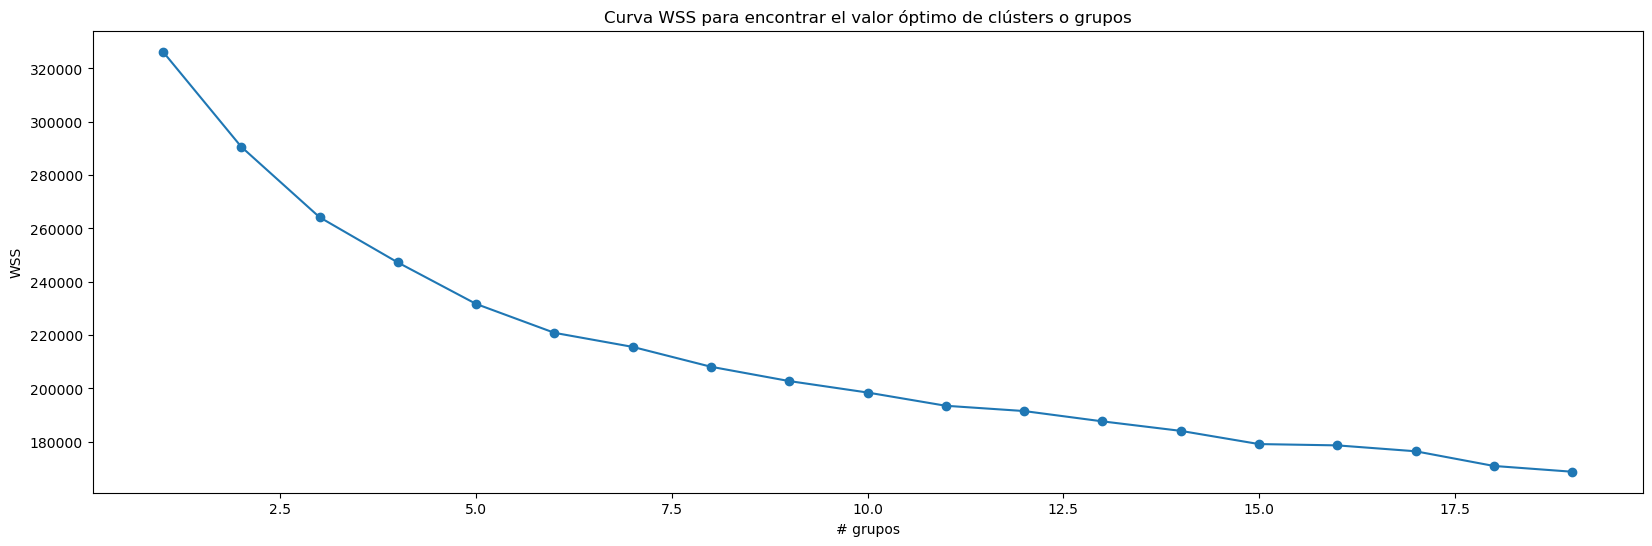

In [6]:
plt.figure(figsize=[20,6])
plt.title('Curva WSS para encontrar el valor óptimo de clústers o grupos')
plt.xlabel('# grupos')
plt.ylabel('WSS')
plt.plot(list(cluster_range),cluster_wss,marker='o')
plt.show()

Elegimos k=3 al ser el punto en el que parece estabilizarse la caída de la curva

In [46]:
model = KMeans(n_clusters=5,random_state=0)
model.fit(df)

KMeans(n_clusters=5, random_state=0)

In [47]:
labels = model.labels_

In [48]:
# Dataframe con variables originales y la predicción
df_total = df.copy()
df_total['cluster']=model.predict(df)
df_total[:2]

,price,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,city_curitiba,city_guarulhos,...,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher,cluster
0,0.008620,1.0,0.5,0.727273,0.333333,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4
1,0.008175,1.0,0.5,0.454545,0.333333,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


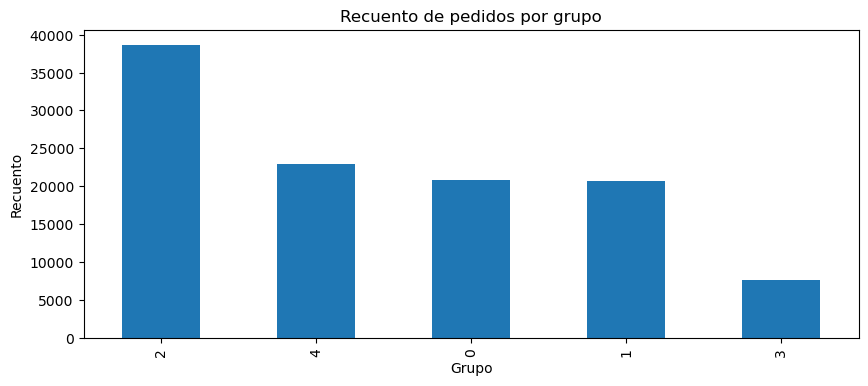

In [49]:
df_total.cluster.value_counts().plot(kind='bar', figsize=(10,4))
plt.title('Recuento de pedidos por grupo')
plt.xlabel('Grupo')
_ = plt.ylabel('Recuento')

In [50]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df, labels)

In [51]:
silhouette_avg

0.1342260732883302

In [28]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score = calinski_harabasz_score(df,labels)


In [29]:
davies_bouldin_score(df, labels)

2.262176176836937

In [30]:
print("Índice de Calinski-Harabasz:", calinski_harabasz_score)

Índice de Calinski-Harabasz: 10573.409428950941


In [31]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
inertia = kmeans.inertia_
inertia

290609.48416050186

In [32]:
# Dataframe con las medias de las variables en cada uno de los grupos
descriptivos_grupos = df_total.groupby(['cluster'],as_index=False).mean()
descriptivos_grupos

,cluster,price,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,city_curitiba,...,category_moveis_decoracao,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher
0,0,0.016777,0.785763,0.786577,0.456141,0.464392,0.000000,0.000000,0.000000,0.000000,...,0.078520,0.358805,0.049489,0.033293,0.067439,0.000000,0.930004,0.021560,0.035550,0.012886
1,1,0.018683,0.736559,0.770849,0.452602,0.468418,0.058150,0.043943,0.000000,0.030642,...,0.113549,0.000000,0.092517,0.071103,0.088652,0.000000,0.933041,0.015495,0.038267,0.013197
2,2,0.021783,0.758848,0.754226,0.461354,0.468376,0.055967,0.042039,0.000000,0.029756,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.931624,0.015195,0.040836,0.012346
3,3,0.018674,0.710994,0.753362,0.465620,0.461723,0.000000,0.000000,0.000000,0.000000,...,0.079514,0.368455,0.060713,0.027549,0.063716,0.172085,0.772555,0.016712,0.025460,0.013187
4,4,0.015541,0.761115,0.754535,0.459543,0.424994,0.030102,0.024705,0.019419,0.021255,...,0.076230,0.349154,0.045793,0.047129,0.056310,1.000000,0.000000,0.000000,0.000000,0.000000
5,5,0.015985,0.779466,0.793183,0.456890,0.455890,0.000000,0.000000,0.061544,0.000000,...,0.073640,0.346768,0.049255,0.036336,0.075092,0.155458,0.785224,0.020225,0.027434,0.011661


### Análisis de componentes principales

In [33]:
pca2 = PCA(n_components=2)
pc = pca2.fit_transform(df)
pc_df = pd.DataFrame(pc)
pca = pd.concat([pc_df, df_total['cluster']],axis=1)
pca.columns = ['pc1','pc2', 'cluster']
pca[:6]

,pc1,pc2,cluster
0,-0.563177,-0.457895,2
1,-0.699338,0.997263,4
2,-0.090778,-0.437716,2
3,-0.508273,-0.380373,2
4,-0.617157,-0.420955,2
5,-0.484527,-0.396574,2


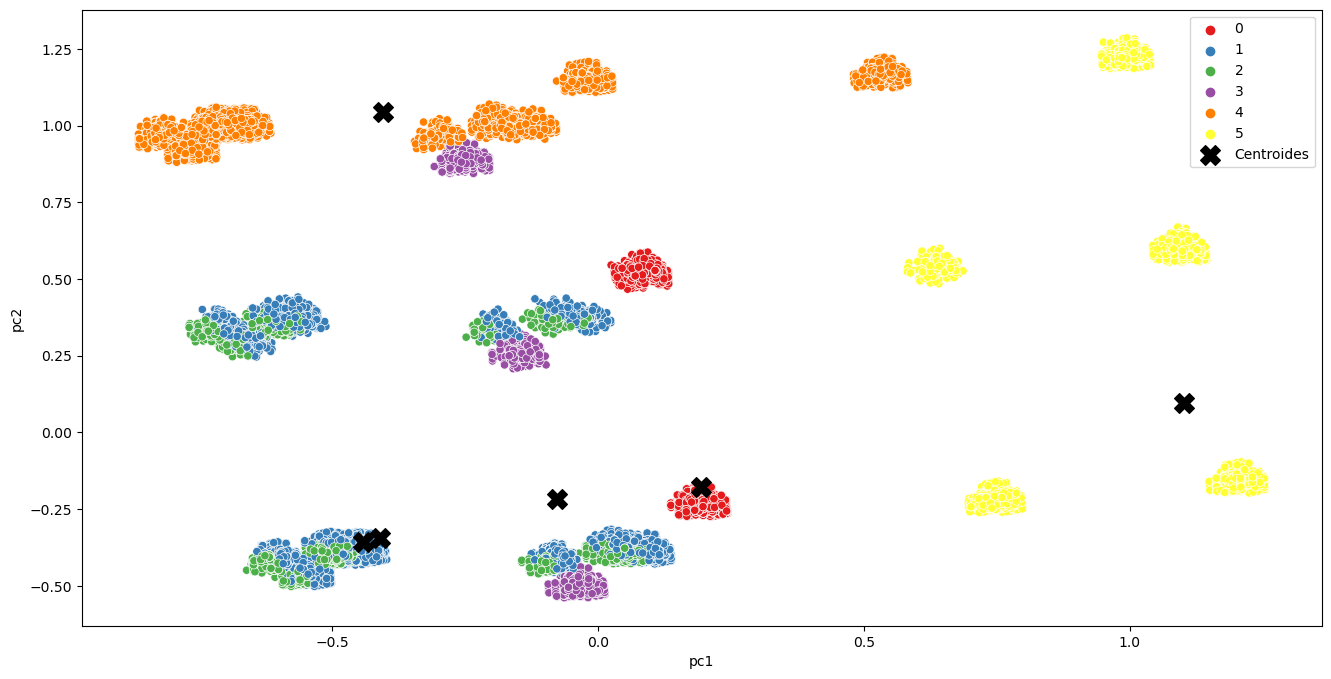

In [34]:
centroids = pca.groupby('cluster').mean()

# Grafica los puntos y los centroides
plt.figure(figsize=[16, 8])
sns.scatterplot(x='pc1', y='pc2', hue='cluster', data=pca, palette='Set1')
plt.scatter(centroids['pc1'], centroids['pc2'], marker='X', s=200, c='black', label='Centroides')
plt.legend()
plt.show()

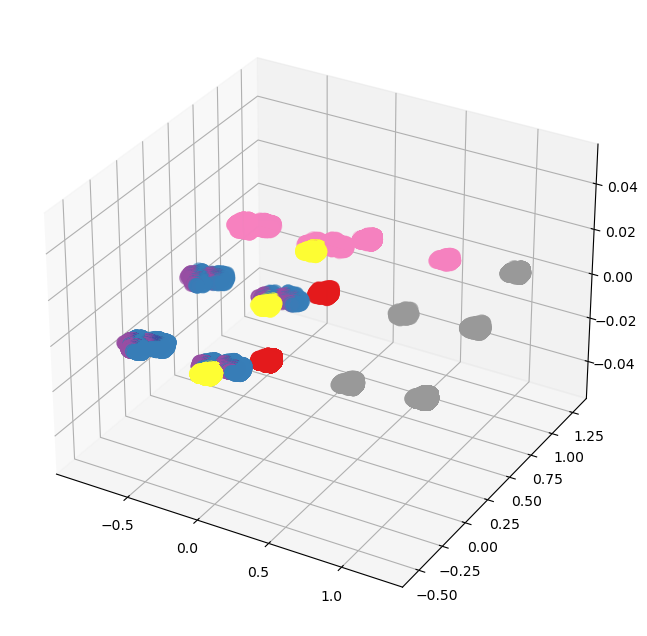

In [35]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca['pc1'], pca['pc2'], c=pca['cluster'], cmap='Set1', s=100)
plt.show()

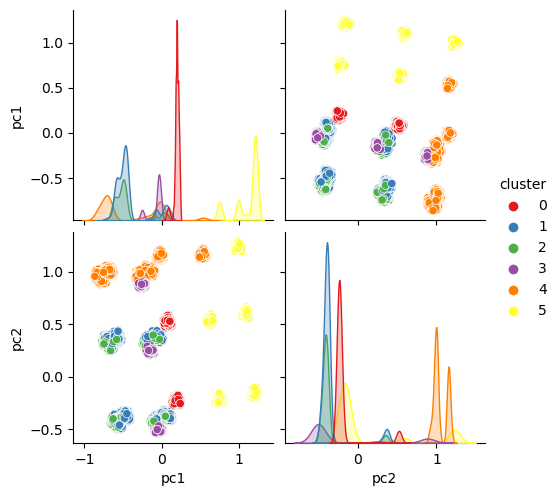

In [36]:
sns.pairplot(pca, hue='cluster', palette='Set1')
plt.show()

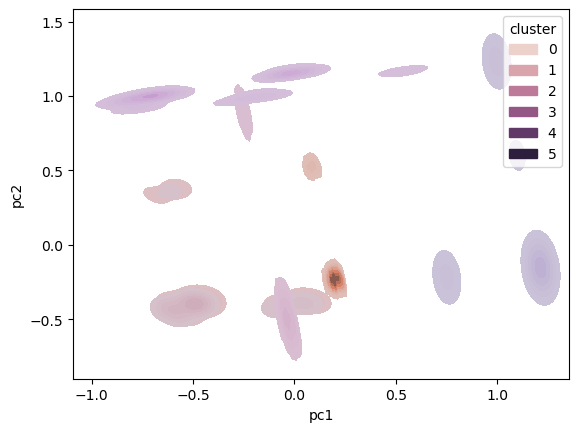

In [37]:
sns.kdeplot(data=pca, x='pc1', y='pc2', hue='cluster', fill=True, cmap='Set1')
plt.show()

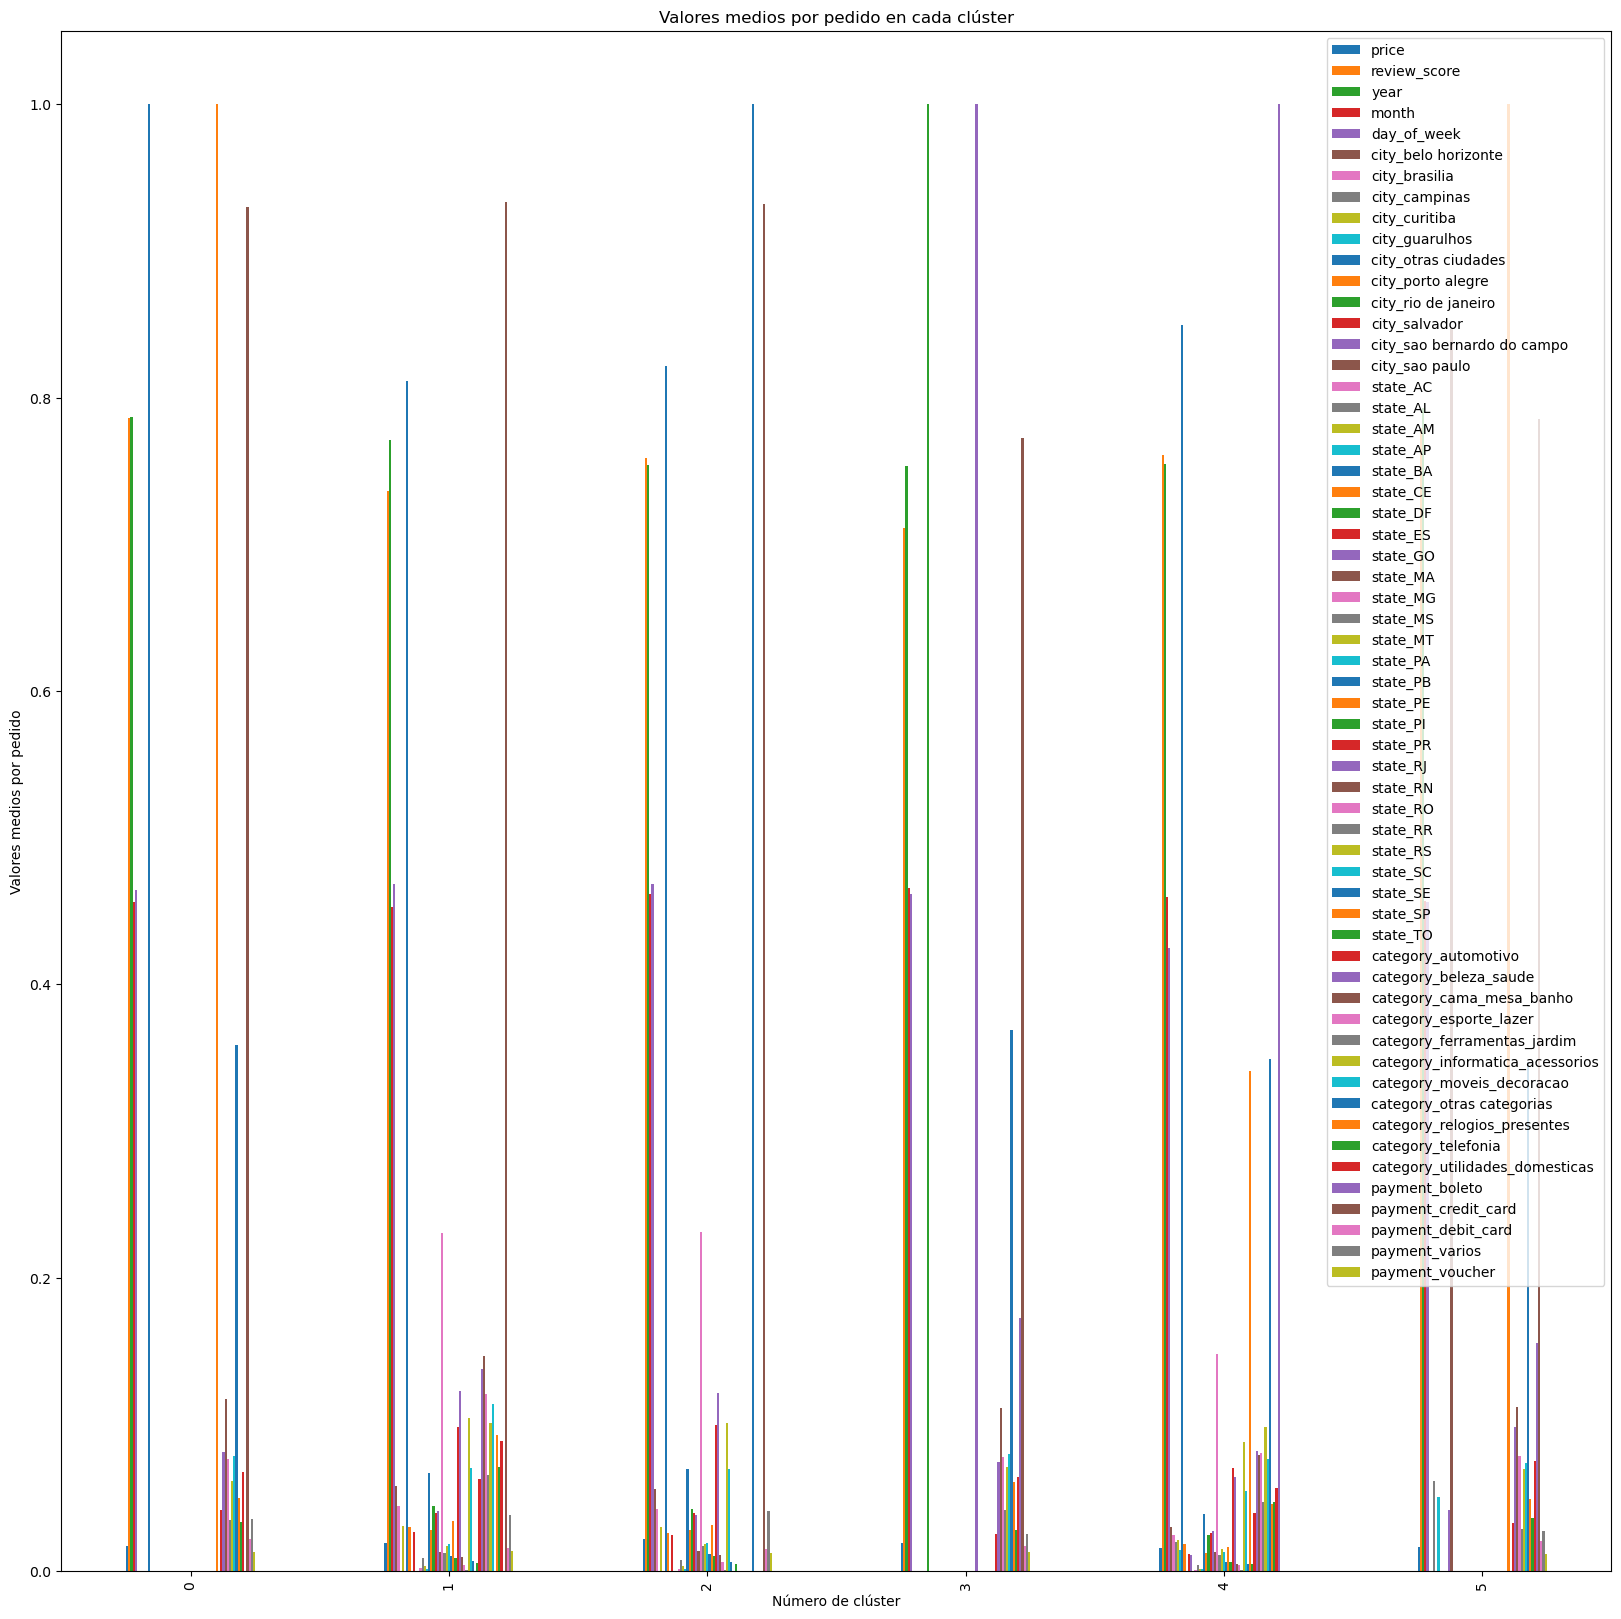

In [38]:
df_total.groupby('cluster').mean().plot(kind='bar', figsize=(20,20))
plt.title('Valores medios por pedido en cada clúster')
plt.xlabel(u'Número de clúster')
_ = plt.ylabel('Valores medios por pedido')

In [39]:
df_total[:6]

,price,review_score,year,month,day_of_week,city_belo horizonte,city_brasilia,city_campinas,city_curitiba,city_guarulhos,...,category_otras categorias,category_relogios_presentes,category_telefonia,category_utilidades_domesticas,payment_boleto,payment_credit_card,payment_debit_card,payment_varios,payment_voucher,cluster
0,0.008620,1.00,0.5,0.727273,0.333333,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
1,0.008175,1.00,0.5,0.454545,0.333333,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4
2,0.009511,0.75,1.0,0.363636,0.666667,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
3,0.008620,1.00,0.5,0.636364,0.166667,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
4,0.008620,1.00,0.5,0.636364,0.500000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
5,0.008175,1.00,0.5,0.545455,0.500000,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
